In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the Nifty 50 stock symbols
nifty50_symbols = ["ADANIPORTS.NS", "ADANIENT.NS", "APOLLOHOSP.NS", "AXISBANK.NS", "ASIANPAINT.NS",
                   "BAJAJFINSV.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BRITANNIA.NS", "BHARTIARTL.NS",
                   "BPCL.NS", "CIPLA.NS", "COALINDIA.NS", "DRREDDY.NS", "DIVISLAB.NS", "EICHERMOT.NS",
                   "GRASIM.NS", "HINDALCO.NS", "HDFC.NS", "HDFCBANK.NS", "HDFCLIFE.NS", "HCLTECH.NS",
                   "HINDUNILVR.NS", "HEROMOTOCO.NS", "ICICIBANK.NS", "ITC.NS", "INFY.NS", "INDUSINDBK.NS",
                   "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS", "M&M.NS", "MARUTI.NS", "NESTLEIND.NS",
                   "ONGC.NS", "NTPC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBIN.NS", "SBILIFE.NS",
                   "SUNPHARMA.NS", "TATASTEEL.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TCS.NS",
                   "TECHM.NS", "TITAN.NS", "UPL.NS", "ULTRACEMCO.NS", "WIPRO.NS"]

# Fetch historical data for all Nifty 50 stocks
data = yf.download(nifty50_symbols, start="2022-07-06", end="2023-07-06")["Adj Close"]

# Initialize an empty correlation matrix
correlation_matrix = np.zeros((len(nifty50_symbols), len(nifty50_symbols)))

# Calculate the correlation coefficients
for i in range(len(nifty50_symbols)):
    for j in range(len(nifty50_symbols)):
        correlation_matrix[i, j] = np.corrcoef(data[nifty50_symbols[i]], data[nifty50_symbols[j]])[0, 1]

# Convert the correlation matrix to a DataFrame
correlation_df = pd.DataFrame(correlation_matrix, index=nifty50_symbols, columns=nifty50_symbols)

# Display the correlation matrix
print(correlation_df)


[*********************100%***********************]  50 of 50 completed
               ADANIPORTS.NS  ADANIENT.NS  APOLLOHOSP.NS  AXISBANK.NS  \
ADANIPORTS.NS       1.000000     0.895127       0.114421    -0.092788   
ADANIENT.NS         0.895127     1.000000       0.077927     0.054183   
APOLLOHOSP.NS       0.114421     0.077927       1.000000     0.746003   
AXISBANK.NS        -0.092788     0.054183       0.746003     1.000000   
ASIANPAINT.NS       0.698570     0.482995       0.301262    -0.184932   
BAJAJFINSV.NS       0.789672     0.730653       0.279845     0.007366   
BAJAJ-AUTO.NS      -0.313420    -0.513522       0.495330     0.304360   
BAJFINANCE.NS       0.607206     0.442645       0.377540    -0.059573   
BRITANNIA.NS       -0.452577    -0.371484       0.714214     0.811935   
BHARTIARTL.NS       0.211531     0.308327       0.792029     0.814324   
BPCL.NS            -0.252386    -0.316524       0.576766     0.603397   
CIPLA.NS            0.670153     0.849336       0.139

In [2]:
# Sort the pairs based on high correlation (excluding self-pairings)
sorted_pairs = correlation_df.unstack().sort_values(ascending=False).drop_duplicates()

# Sort the pairs based on high correlation (excluding self-pairings)
sorted_pairs = correlation_df.unstack().sort_values(ascending=False).drop_duplicates()

# Display the top 10 rows
top_10_pairs = sorted_pairs.head(10)
print(top_10_pairs)

ADANIPORTS.NS  ADANIPORTS.NS    1.000000
HINDALCO.NS    HINDALCO.NS      1.000000
NESTLEIND.NS   NESTLEIND.NS     1.000000
HDFCBANK.NS    HDFC.NS          0.990974
BAJAJ-AUTO.NS  TATAMOTORS.NS    0.952235
TATAMOTORS.NS  BAJAJ-AUTO.NS    0.952235
LT.NS          ULTRACEMCO.NS    0.928697
               HDFC.NS          0.917349
               ONGC.NS          0.913567
HDFCBANK.NS    LT.NS            0.908238
dtype: float64


In [3]:
import yfinance as yf
import numpy as np

# Define the stock tickers
stock1_ticker = 'LT.NS'
stock2_ticker = 'ULTRACEMCO.NS'

# Fetch historical data for stock1
stock1_data = yf.download(stock1_ticker, start='2022-07-06', end='2023-07-06')
stock1_close = stock1_data['Close']

# Fetch historical data for stock2
stock2_data = yf.download(stock2_ticker, start='2022-07-06', end='2023-07-06')
stock2_close = stock2_data['Close']

# Calculate the correlation coefficient
correlation = np.corrcoef(stock1_close, stock2_close)[0, 1]

# Display the correlation coefficient
print(f"Correlation between {stock1_ticker} and {stock2_ticker}: {correlation}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation between LT.NS and ULTRACEMCO.NS: 0.9270182082221032


In [4]:
price_ratio = stock1_close / stock2_close
price_ratio_mean = np.mean(price_ratio)
price_ratio_std = np.std(price_ratio)
z_score = (price_ratio - price_ratio_mean) / price_ratio_std

print(f"price_ratio_mean = {price_ratio_mean}")
print(f"price_ratio_std = {price_ratio_std}")

price_ratio_mean = 0.2949890862185858
price_ratio_std = 0.010308177920991805


In [5]:
min_value = np.min(price_ratio)
print("Minimum value:", min_value)

max_value = np.max(price_ratio)
print("Maximum value:", max_value)

Minimum value: 0.26382245537313315
Maximum value: 0.32607029453629693


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

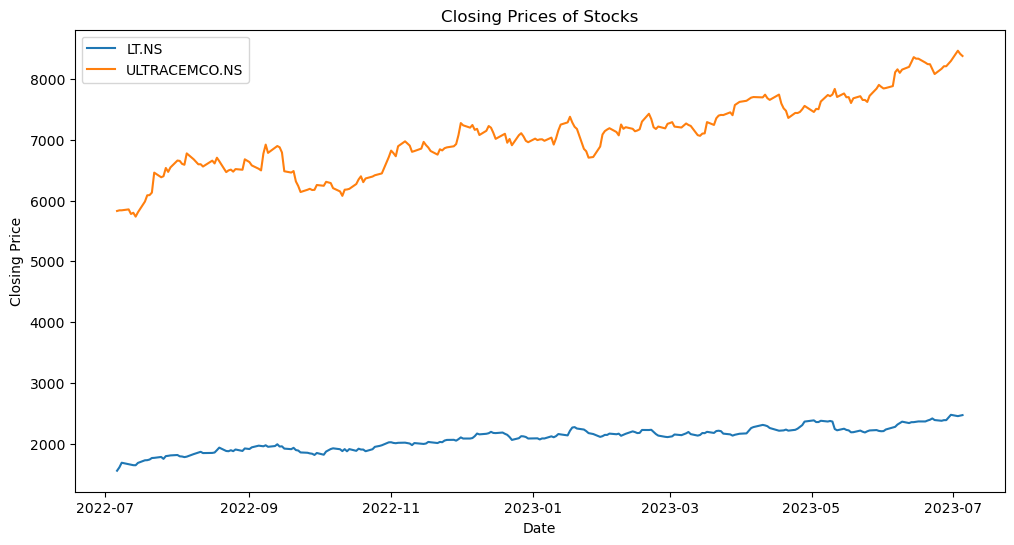

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(stock1_close.index, stock1_close, label=stock1_ticker)
ax.plot(stock2_close.index, stock2_close, label=stock2_ticker)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.title('Closing Prices of Stocks')
plt.show()

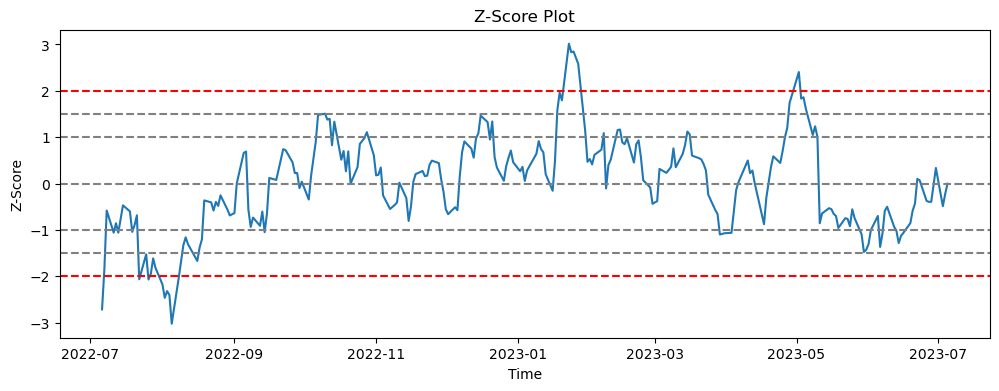

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(z_score.index, z_score)
ax.axhline(2, linestyle='dashed', color='red')
ax.axhline(-2, linestyle='dashed', color='red')
ax.axhline(0, linestyle='dashed', color='gray')
ax.axhline(1, linestyle='dashed', color='gray')
ax.axhline(-1, linestyle='dashed', color='gray')
ax.axhline(1.5, linestyle='dashed', color='gray')
ax.axhline(-1.5, linestyle='dashed', color='gray')

ax.set_xlabel('Time')
ax.set_ylabel('Z-Score')
ax.set_title('Z-Score Plot')

plt.show()


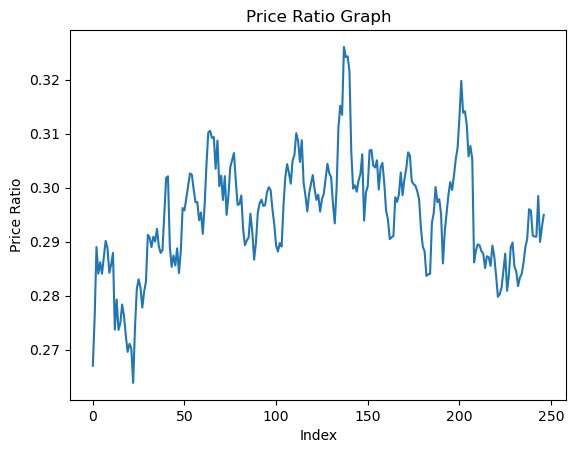

In [9]:
import matplotlib.pyplot as plt
x = range(len(price_ratio))

plt.plot(x, price_ratio)
plt.xlabel('Index')
plt.ylabel('Price Ratio')
plt.title('Price Ratio Graph')
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(price_ratio)
print('ADF Test Statistic: %f' % adf[0])
print('10%% Critical Value: %f' % adf[4]['10%'])
print('p-value: %f' % adf[1])

ADF Test Statistic: -3.864655
10% Critical Value: -2.573096
p-value: 0.002311


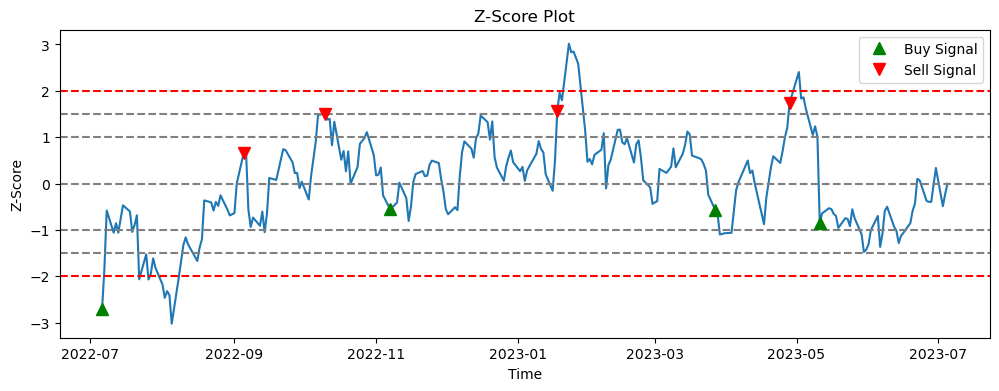

Number of Sell signals: 4
Number of Buy signals: 4


In [11]:
import matplotlib.pyplot as plt

sell_signals = []
buy_signals = []
signals = []

status = 'NONE'
for i in z_score.index:
    if (z_score[i] > 1.5) and (status != 'SELL'):
        sell_signals.append(i)
        signals.append((i, 'SELL'))
        status = 'SELL'
    elif (z_score[i] < -1.5) and (status != 'BUY'):
        buy_signals.append(i)
        signals.append((i, 'BUY'))
        status = 'BUY'
    elif (z_score[i] < -0.5) and (status == 'SELL'):
        buy_signals.append(i)
        signals.append((i, 'BUY'))
        status = 'MEAN'
    elif (z_score[i] > 0.5) and (status == 'BUY'):
        sell_signals.append(i)
        signals.append((i, 'SELL'))
        status = 'MEAN'
    else:
        signals.append((i, 'NONE'))

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(z_score.index, z_score)
ax.axhline(2, linestyle='dashed', color='red')
ax.axhline(-2, linestyle='dashed', color='red')
ax.axhline(0, linestyle='dashed', color='gray')
ax.axhline(1, linestyle='dashed', color='gray')
ax.axhline(-1, linestyle='dashed', color='gray')
ax.axhline(1.5, linestyle='dashed', color='gray')
ax.axhline(-1.5, linestyle='dashed', color='gray')

# Plot buy and sell signals
ax.plot([x[0] for x in signals if x[1] == 'BUY'], [z_score[x[0]] for x in signals if x[1] == 'BUY'],
        'g^', markersize=8, label='Buy Signal')
ax.plot([x[0] for x in signals if x[1] == 'SELL'], [z_score[x[0]] for x in signals if x[1] == 'SELL'],
        'rv', markersize=8, label='Sell Signal')

ax.set_xlabel('Time')
ax.set_ylabel('Z-Score')
ax.set_title('Z-Score Plot')
ax.legend()

plt.show()

print("Number of Sell signals:", len(sell_signals))
print("Number of Buy signals:", len(buy_signals))


Returns: 94.69904384765626%
Current Value: 973495.2192382812
Cumulative Return: 0.9469904384765625
Sharpe Ratio: 31.238398124572615
Maximum Drawdown: -0.45561395311103486


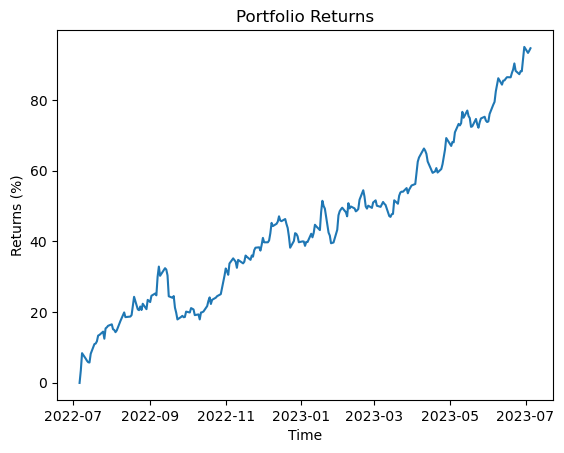

In [13]:
import matplotlib.pyplot as plt

capital = 5_00_000

n_stock1 = (capital // 2) // stock1_data['Close'][0]
n_stock2 = (capital // 2) // stock2_data['Close'][0]

capital -= n_stock1 * stock1_data['Close'][0]
capital -= n_stock2 * stock2_data['Close'][0]

index = []
returns = []

for i in signals:
    if i[1] == 'SELL':
        capital += n_stock1 * stock1_data['Close'][i[0]]
        n_stock1 = 0
        n_stock2 += capital // stock2_data['Close'][i[0]]
        capital -= (capital // stock2_data['Close'][i[0]]) * stock2_data['Close'][i[0]]
    elif i[1] == 'BUY':
        capital += n_stock2 * stock2_data['Close'][i[0]]
        n_stock2 = 0
        n_stock1 += capital // stock1_data['Close'][i[0]]
        capital -= (capital // stock1_data['Close'][i[0]]) * stock1_data['Close'][i[0]]

    current_value = n_stock1 * stock1_data['Close'][i[0]] + n_stock2 * stock2_data['Close'][i[0]]

    returns.append((current_value / 5_00_000 - 1) * 100)
    index.append(i[0])



# Calculate portfolio returns and statistics
portfolio_returns = pd.Series(returns)
cumulative_return = (current_value - 5_00_000) / 5_00_000
print(f"Returns: {cumulative_return * 100}%")
sharpe_ratio = np.sqrt(252) * (portfolio_returns.mean() / portfolio_returns.std())
drawdown = (portfolio_returns - portfolio_returns.cummax()) / portfolio_returns.cummax()
max_drawdown = np.min(drawdown)

# Print portfolio statistics
print("Current Value:", current_value)
print("Cumulative Return:", cumulative_return)
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)

plt.plot(index, returns)
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.title('Portfolio Returns')
plt.show()
